In [27]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(os.path.dirname(module_path))

from collections import defaultdict
from rl.markov_decision_process import  StateActionMapping, FinitePolicy, FiniteMarkovDecisionProcess
from rl.markov_process import FiniteMarkovRewardProcess
from rl.markov_process import StateReward
from rl.distribution import Choose,Constant,Categorical
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt

from typing import (Dict, Iterable, Generic, Sequence, Tuple,
                    Mapping, Optional, TypeVar, Generator)

In [73]:
def getMapping(n):
    N = [i for i in range(n) if i!=0] ##non-terminal states
    t = [0,n]
    actions = ["A","B"]
    rewards = {i:0 for i in range(n) if i!=0}
    rewards[0]=0
    rewards[n]=1
    mapping={}
    for i in N:
        mapping[i]={}
        for a in actions:
            if a=="A":
                d ={(i-1,rewards[i-1]):i/n,(i+1,rewards[i+1]):1-i/n}
            else:
                d = {(j,rewards[j]):1/n for j in range(n+1) if j!=i}
            mapping[i][a]= Categorical(d)
    mapping[0]=None
    mapping[n]=None
    return mapping

In [74]:
mdp = FiniteMarkovDecisionProcess(getMapping(3))

In [75]:
print(mdp)

From State 1:
  With Action A:
    To [State 0 and Reward 0.000] with Probability 0.333
    To [State 2 and Reward 0.000] with Probability 0.667
  With Action B:
    To [State 0 and Reward 0.000] with Probability 0.333
    To [State 2 and Reward 0.000] with Probability 0.333
    To [State 3 and Reward 1.000] with Probability 0.333
From State 2:
  With Action A:
    To [State 1 and Reward 0.000] with Probability 0.667
    To [State 3 and Reward 1.000] with Probability 0.333
  With Action B:
    To [State 0 and Reward 0.000] with Probability 0.333
    To [State 1 and Reward 0.000] with Probability 0.333
    To [State 3 and Reward 1.000] with Probability 0.333
0 is a Terminal State
3 is a Terminal State



In [76]:
from itertools import product
## policies, each non terminal state, we can have a or b,
def getAllPolicies(n):
    ##list of all policies
    all_policies = []
    allProduct = product("AB",repeat = n-1)
    
    for scen in allProduct:
        i = 1
        d = {}
        for action in scen:
            d[i]=Constant(action)
            i+=1
        d[0] = None
        d[n] = None
        all_policies.append(FinitePolicy(d))
    return all_policies

In [77]:
n=3
mdp = FiniteMarkovDecisionProcess(getMapping(n))
policies = getAllPolicies(n)
for i,pol in enumerate(policies):
    mrp = mdp.apply_finite_policy(pol)
    print("policy {} has V* = {} ".format(i,mrp.get_value_function_vec(1)))

policy 0 has V* = [0.4 0.6] 
policy 1 has V* = [0.28571429 0.42857143] 
policy 2 has V* = [0.57142857 0.71428571] 
policy 3 has V* = [0.5 0.5] 


In [80]:
def optimal_policy(n,mdp):
    ## return best policy that's strictly greater than the rest
    optimal_policy = None
    v_star = None
    for pol in getAllPolicies(n):
        mrp = mdp.apply_finite_policy(pol)
        value = mrp.get_value_function_vec(1)
        if optimal_policy is None or (v_star<value).all():
            optimal_policy=pol
            v_star=value
    return optimal_policy

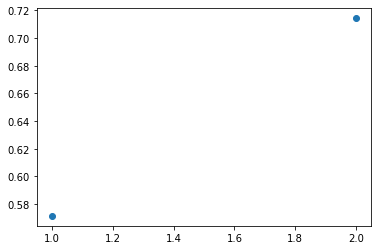

In [88]:
n=3
mdp = FiniteMarkovDecisionProcess(getMapping(n))
pol = optimal_policy(n,mdp)
mrp = mdp.apply_finite_policy(pol)
value = mrp.get_value_function_vec(1)
plt.scatter(range(1,n),value)

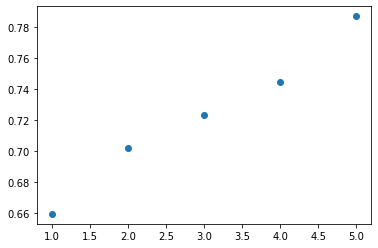

In [92]:
n=6
mdp = FiniteMarkovDecisionProcess(getMapping(n))
pol = optimal_policy(n,mdp)
mrp = mdp.apply_finite_policy(pol)
value = mrp.get_value_function_vec(1)
plt.scatter(range(1,n),value)

In [93]:
pol

For State 1:
  Do Action B with Probability 1.000
For State 2:
  Do Action A with Probability 1.000
For State 3:
  Do Action A with Probability 1.000
For State 4:
  Do Action A with Probability 1.000
For State 5:
  Do Action A with Probability 1.000
0 is a Terminal State
6 is a Terminal State

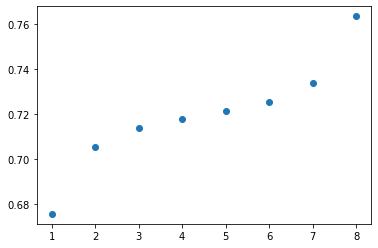

In [90]:
n=9
mdp = FiniteMarkovDecisionProcess(getMapping(n))
pol = optimal_policy(n,mdp)
mrp = mdp.apply_finite_policy(pol)
value = mrp.get_value_function_vec(1)
plt.scatter(range(1,n),value)

As n increases, we can see the lowest probability increases, likelihood to reach n increases, we also see that croack B only works for the first state. 

In [91]:
pol

For State 1:
  Do Action B with Probability 1.000
For State 2:
  Do Action A with Probability 1.000
For State 3:
  Do Action A with Probability 1.000
For State 4:
  Do Action A with Probability 1.000
For State 5:
  Do Action A with Probability 1.000
For State 6:
  Do Action A with Probability 1.000
For State 7:
  Do Action A with Probability 1.000
For State 8:
  Do Action A with Probability 1.000
0 is a Terminal State
9 is a Terminal State